In [4]:
import pandas as pd
import matplotlib as plt
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk import *
from wordcloud import WordCloud


In [5]:
df = pd.read_csv('Resources/fake_job_postings.csv')

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,US; NY; New York,Marketing,NaN,We're Food52 and we've created a groundbreakin...,Food52 a fast-growing James Beard Award-winnin...,Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,NZ; ; Auckland,Success,NaN,90 Seconds the worlds Cloud Video Production S...,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),US; IA; Wever,NaN,NaN,Valor Services provides Workforce Solutions th...,Our client located in Houston is actively seek...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,US; DC; Washington,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,EDUCATION: Bachelor’s or Master’s in GIS busin...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,US; FL; Fort Worth,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Data structure analysis

In [6]:
df.shape

(17880, 18)

In [7]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
df.nunique()

job_id                 17880
title                  11228
location                3105
department              1337
salary_range             874
company_profile         1709
description            14796
requirements           11966
benefits                6202
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [9]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Text(0, 0.5, 'Count')

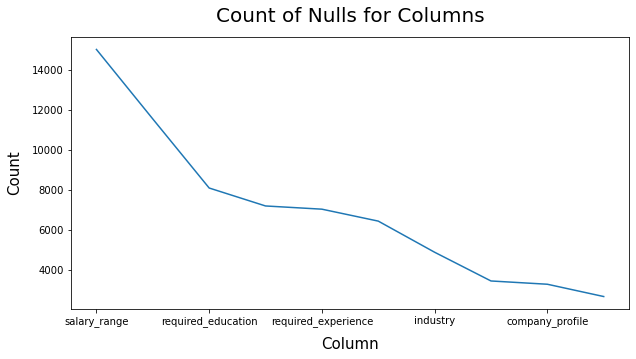

In [10]:
# count column null values and sort by total, only keeping top results
count_na = df.isna().sum().sort_values(ascending=False)
not_top_ten = len(count_na) - 10
not_top_ten_sum = count_na.tail(not_top_ten).sum()
s_top = count_na.head(10)
figure = plt.figure(figsize = (10,5))
s_top.plot()
plt.title('Count of Nulls for Columns', pad=15, size=20)
plt.xlabel('Column',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)

In [11]:
total_jobs = len(df.index)

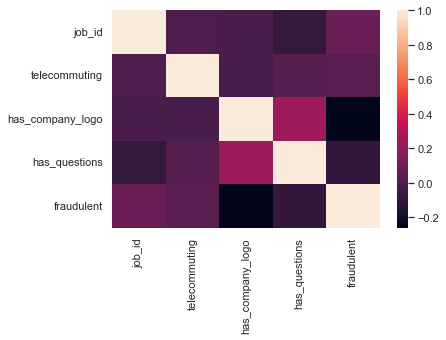

In [12]:
# no correlation
heatmap = df.corr()
sns.set_theme(style="white")
sns.heatmap(heatmap)
plt.show()


Text(0, 0.5, 'Count')

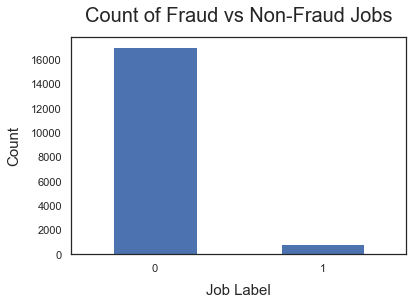

In [13]:
# plot of fraud vs not fraud
count_bar = df['fraudulent'].value_counts().plot(kind='bar', rot=0)
plt.title('Count of Fraud vs Non-Fraud Jobs', pad=15, size=20)
plt.xlabel('Job Label',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)

In [14]:
# split fraud and non fraud into counts
fraud_df = df[df['fraudulent'] == 1]
non_fraud_df = df[df['fraudulent'] == 0]

array([[<AxesSubplot:title={'center':'job_id'}>,
        <AxesSubplot:title={'center':'telecommuting'}>],
       [<AxesSubplot:title={'center':'has_company_logo'}>,
        <AxesSubplot:title={'center':'has_questions'}>],
       [<AxesSubplot:title={'center':'fraudulent'}>, <AxesSubplot:>]],
      dtype=object)

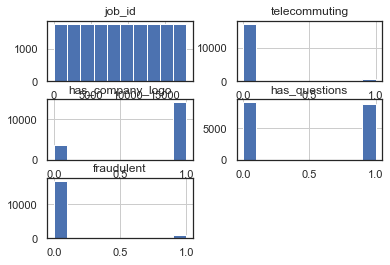

In [15]:
df.hist()

# Unique Values

In [16]:
df.nunique().sort_values(ascending=False)

job_id                 17880
description            14796
requirements           11966
title                  11228
benefits                6202
location                3105
company_profile         1709
department              1337
salary_range             874
industry                 131
function                  37
required_education        13
required_experience        7
employment_type            5
telecommuting              2
has_questions              2
has_company_logo           2
fraudulent                 2
dtype: int64

Text(0, 0.5, 'Count')

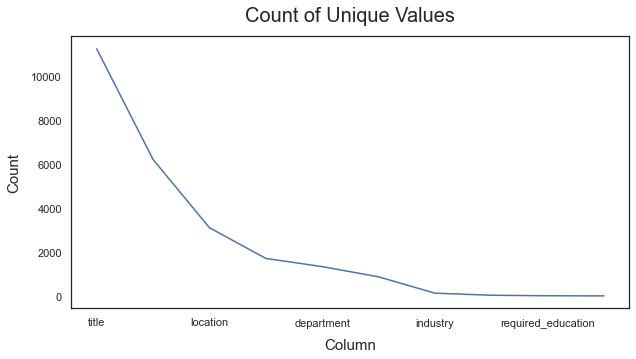

In [17]:
# no job_id
df_u = df.drop(columns=['job_id', 'description', 'requirements'])
count_unique = df_u.nunique().sort_values(ascending=False)
not_top_ten = len(count_unique) - 10
not_top_ten_sum = count_unique.tail(not_top_ten).sum()
count_top = count_unique.head(10)
figure = plt.figure(figsize = (10,5))
count_top.plot()
plt.title('Count of Unique Values', pad=15, size=20)
plt.xlabel('Column',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)

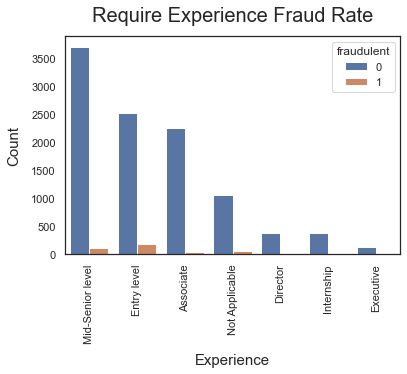

In [18]:
# plot by df column with non stacking bars
sns.countplot(x=df['required_experience'], data=df, hue="fraudulent",
              order=df['required_experience'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Require Experience Fraud Rate', pad=15, size=20)
plt.xlabel('Experience',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

17014 866 17880


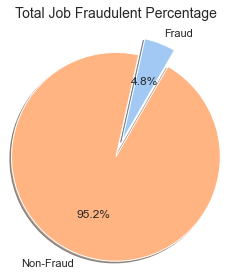

In [19]:
# counts of df
total_count = len(df.index)
fraud_count = len(fraud_df.index)
non_fraud_count = len(non_fraud_df.index)

print(non_fraud_count, fraud_count, total_count)

# pie chart - % fraud vs non fraud
labels = 'Fraud', 'Non-Fraud'
data = [fraud_count, non_fraud_count]
colors = sns.color_palette('pastel')

# customizations
explode = [0.2,0]
plt.title('Total Job Fraudulent Percentage', pad=30, fontsize=14)

plot = plt.pie(data, labels=labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle=60, radius=1.2, colors=colors)


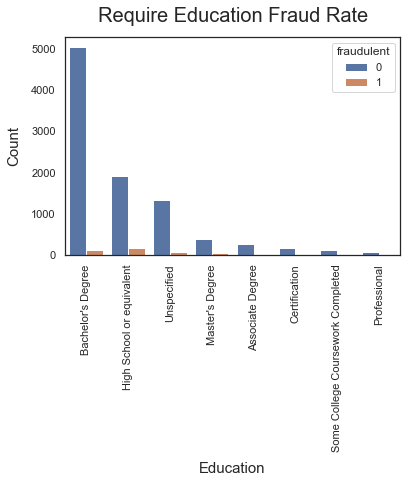

In [20]:
# req education
sns.countplot(x=df['required_education'], data=df, hue="fraudulent",
              order=df['required_education'].value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.title('Require Education Fraud Rate', pad=15, size=20)
plt.xlabel('Education',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

In [21]:
# dataframe filter on column by condition  bachelors
dfed = df[df['required_education'] == "Bachelor's Degree"]
dfed.count()

job_id                 5145
title                  5145
location               5112
department             2075
salary_range           1106
company_profile        4474
description            5145
requirements           4898
benefits               3763
telecommuting          5145
has_company_logo       5145
has_questions          5145
employment_type        5105
required_experience    4212
required_education     5145
industry               4974
function               4352
fraudulent             5145
dtype: int64

In [22]:
# fraud jobs of above df
dfed[dfed['fraudulent'] == 1].count()

job_id                 100
title                  100
location                98
department              75
salary_range            25
company_profile         76
description            100
requirements            92
benefits                57
telecommuting          100
has_company_logo       100
has_questions          100
employment_type        100
required_experience     90
required_education     100
industry                99
function                98
fraudulent             100
dtype: int64

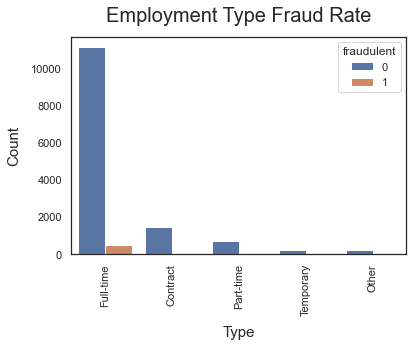

In [23]:
# req education
sns.countplot(x=df['employment_type'], data=df, hue="fraudulent",
              order=df['employment_type'].value_counts().iloc[:8].index)
plt.xticks(rotation=90)
plt.title('Employment Type Fraud Rate', pad=15, size=20)
plt.xlabel('Type',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

In [24]:
# follows same logic as above 
dfe = df[df['employment_type'] == 'Full-time']
dfe.count()

job_id                 11620
title                  11620
location               11524
department              4432
salary_range            2478
company_profile         9821
description            11620
requirements           10173
benefits                7312
telecommuting          11620
has_company_logo       11620
has_questions          11620
employment_type        11620
required_experience     8886
required_education      7556
industry               10216
function                9178
fraudulent             11620
dtype: int64

In [25]:
dfe.count()

job_id                 11620
title                  11620
location               11524
department              4432
salary_range            2478
company_profile         9821
description            11620
requirements           10173
benefits                7312
telecommuting          11620
has_company_logo       11620
has_questions          11620
employment_type        11620
required_experience     8886
required_education      7556
industry               10216
function                9178
fraudulent             11620
dtype: int64

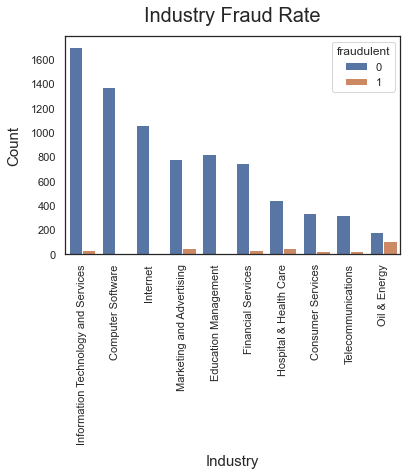

In [26]:
# req education
sns.countplot(x=df['industry'], data=df, hue="fraudulent",
              order=df['industry'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Industry Fraud Rate', pad=15, size=20)
plt.xlabel('Industry',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

In [27]:
# checking oil industry counts 
dfi = df[df['industry'] == 'Oil & Energy']
dfi[dfi['fraudulent']==1].count()

job_id                 109
title                  109
location               107
department              53
salary_range            21
company_profile         64
description            109
requirements           106
benefits                62
telecommuting          109
has_company_logo       109
has_questions          109
employment_type         95
required_experience     46
required_education      57
industry               109
function               106
fraudulent             109
dtype: int64

In [28]:
dfi.count()

job_id                 287
title                  287
location               285
department             110
salary_range            55
company_profile        234
description            287
requirements           275
benefits               137
telecommuting          287
has_company_logo       287
has_questions          287
employment_type        256
required_experience    172
required_education     145
industry               287
function               235
fraudulent             287
dtype: int64

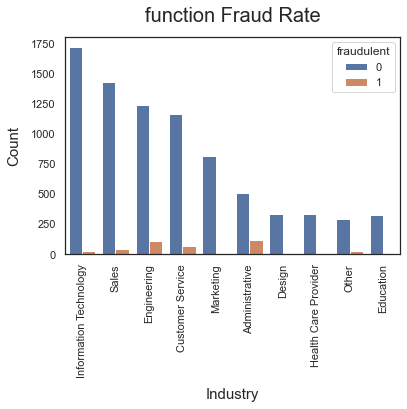

In [29]:
# req education
sns.countplot(x=df['function'], data=df, hue="fraudulent",
              order=df['function'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('function Fraud Rate', pad=15, size=20)
plt.xlabel('Industry',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

In [30]:
# checking administrative count
dff = df[df['function'] == 'Administrative']
dff[dff['fraudulent']==1].count()

job_id                 119
title                  119
location               117
department              36
salary_range            51
company_profile         10
description            119
requirements            94
benefits                55
telecommuting          119
has_company_logo       119
has_questions          119
employment_type         98
required_experience    108
required_education      89
industry                95
function               119
fraudulent             119
dtype: int64

In [31]:
dff.count()

job_id                 630
title                  630
location               620
department             157
salary_range           155
company_profile        462
description            630
requirements           579
benefits               378
telecommuting          630
has_company_logo       630
has_questions          630
employment_type        583
required_experience    559
required_education     528
industry               515
function               630
fraudulent             630
dtype: int64

# Location 

In [32]:
df2 = pd.read_csv('Resources/fake_job_postings_cleaned_v2.csv')
df2.head()

,Unnamed: 0,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City,State
0,0,Marketing Intern,Marketing,Were Food52 and weve created a groundbreaking ...,Food52 a fastgrowing James Beard Awardwinning ...,Experience with content management systems a m...,none,0,1,0,Other,Internship,none,none,Marketing,0,US,NY,New York
1,1,Customer Service - Cloud Video Production,Success,90 Seconds the worlds Cloud Video Production S...,OrganisedFocusedVibrantAwesomeDo you have a pa...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,none,Marketing and Advertising,Customer Service,0,NZ,none,Auckland
2,2,Commissioning Machinery Assistant (CMA),none,Valor Services provides Workforce Solutions th...,Our client located in Houston is actively seek...,Implement precommissioning and commissioning p...,none,0,1,0,none,none,none,none,none,0,US,IA,Wever
3,3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY ESRIEnvironmental Systems Research...,EDUCATION Bachelors or Masters in GIS business...,Our culture is anything but corporatewe have a...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,4,Bill Review Manager,none,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review ManagerLOCATION F...,QUALIFICATIONSRN license in the State of Texas...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


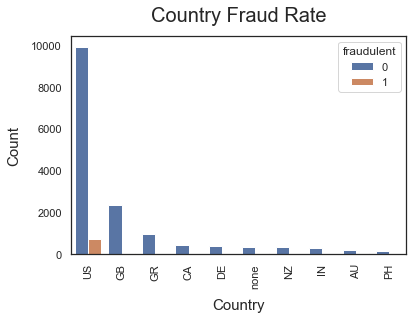

In [33]:
sns.countplot(x=df2['Country'], data=df, hue="fraudulent",
              order=df2['Country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('Country Fraud Rate', pad=15, size=20)
plt.xlabel('Country',size=15, labelpad=10)
plt.ylabel('Count',size=15, labelpad=10)
plt.show()

# Word Cloud

In [34]:
# add all text columns into one for analysis and seperate into fraud vs non fraud
df2['text']=df2['company_profile']+' '+df2['description']+' '+df2['requirements']+' '+df2['benefits']
df2_fraud = df2[df['fraudulent'] == 1]
df2_nonfraud = df2[df['fraudulent'] == 0]

In [35]:
# fill empty 
df2_fraud.text.fillna(' ', inplace=True)
df2_fraud['text'].isna().sum()

C:\Users\antho\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

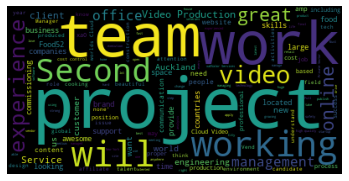

In [41]:
# set instance of wordcloud and generate cloud based on fraud or not fraud
text = df2_nonfraud['text'].values
text_fraud = df2_fraud['text'].values

wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('non_fraud_wordcloud.png', transparent=False, bbox_inches="tight")
plt.show()

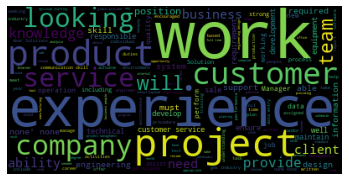

In [42]:
wordcloudnf = WordCloud().generate(str(text_fraud))
plt.imshow(wordcloudnf)
plt.axis("off")
plt.savefig('fraud_word_cloud.png', transparent=False, bbox_inches="tight")
plt.show()